In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import plotly.express as pe

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from numpy.random import mtrand

In [5]:
df=pd.read_csv('chat_dataset.csv')
df.head(3)

,message,sentiment
0,I really enjoyed the movie,positive
1,The food was terrible,negative
2,I'm not sure how I feel about this,neutral


In [6]:
df2 = df.applymap(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))

C:\Users\rajsp\AppData\Local\Temp\ipykernel_7052\282179183.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2 = df.applymap(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))


In [7]:
df2.head(330)

,message,sentiment
0,I really enjoyed the movie,positive
1,The food was terrible,negative
2,I'm not sure how I feel about this,neutral
3,The service was excellent,positive
4,I had a bad experience,negative
...,...,...
325,I'm so glad I made this purchase,positive
326,The food at the wedding was delicious,positive
327,Hey.. what's up?,neutral
328,I'm feeling so-so,neutral


In [8]:
df.shape

(584, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   message    584 non-null    object
 1   sentiment  584 non-null    object
dtypes: object(2)
memory usage: 9.3+ KB


In [11]:
for i in range(3):
    print("Message: ", [i])
    print(df2['message'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Message:  [0]
I really enjoyed the movie 

Sentiment:  positive 


Message:  [1]
The food was terrible 

Sentiment:  negative 


Message:  [2]
I'm not sure how I feel about this 

Sentiment:  neutral 




In [12]:
df2.groupby(['sentiment'])[['sentiment']].count()

,sentiment
sentiment,
negative,147
neutral,259
positive,178


In [13]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [15]:
df2['word_count'] = df2['message'].apply(no_of_words)
df2.head(10)

,message,sentiment,word_count
0,I really enjoyed the movie,positive,5
1,The food was terrible,negative,4
2,I'm not sure how I feel about this,neutral,8
3,The service was excellent,positive,4
4,I had a bad experience,negative,5
5,This is a great product,positive,5
6,I wouldn't recommend this,negative,4
7,The price is a bit high,neutral,6
8,The weather is perfect today,positive,5
9,The traffic is horrible,negative,4


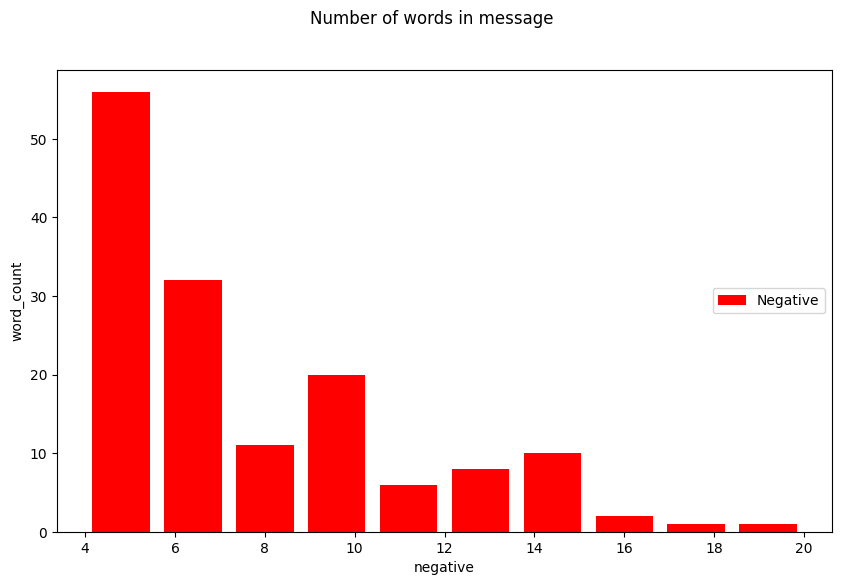

In [18]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.hist(df2[df2['sentiment'] == 'negative']['word_count'], label='Negative', color='red', rwidth=0.8)
ax.legend(loc='right')
ax.set(xlabel="negative", ylabel="word_count")
fig.suptitle("Number of words in message")
plt.show()

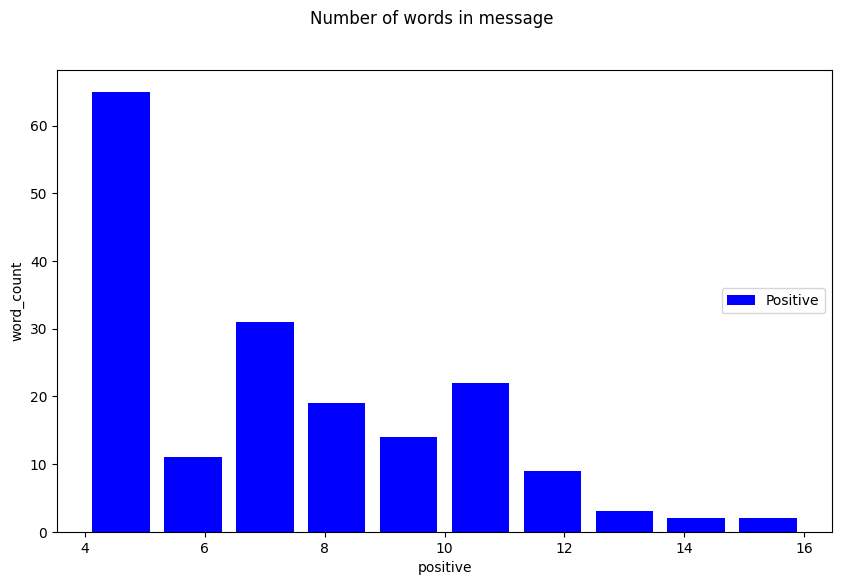

In [19]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.hist(df2[df2['sentiment'] == 'positive']['word_count'], label='Positive', color='blue', rwidth=0.8)
ax.legend(loc='right')
ax.set(xlabel="positive", ylabel="word_count")
fig.suptitle("Number of words in message")
plt.show()

In [21]:
df2.sentiment.replace("positive", 1, inplace=True)
df2.sentiment.replace("negative", 0, inplace=True)
df2.sentiment.replace("neutral", 2, inplace=True)
df2.head(3)

,message,sentiment,word_count
0,I really enjoyed the movie,1,5
1,The food was terrible,0,4
2,I'm not sure how I feel about this,2,8


In [23]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to D:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to D:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
stop_words = set(stopwords.words('english'))
def stopw(mes):
  mes=BeautifulSoup(mes).get_text()
  mes=mes.lower()
  mes=re.sub("[^a-zA-Z]",' ',mes)
  mes=re.sub(r"https\S+|www\S+|http\S+", '', mes, flags = re.MULTILINE)
  mes=re.sub(r'\@w+|\#', '', mes)
  mes=re.sub(r'[^\w\s]', '', mes)
  tok_mes=word_tokenize(mes)
  filtered_mes=[w for w in tok_mes if not w in stop_words]
  return " ".join(filtered_mes)
df2.message = df2['message'].apply(stopw)

C:\Users\rajsp\AppData\Local\Temp\ipykernel_7052\1302249995.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  mes=BeautifulSoup(mes).get_text()


In [26]:
duplicatecount = df2.duplicated().sum()
print("Number of duplicate entries: ", duplicatecount)
df3 = df2.drop_duplicates('message')
df3.head(5)

Number of duplicate entries:  48


,message,sentiment,word_count
0,really enjoyed movie,1,5
1,food terrible,0,4
2,sure feel,2,8
3,service excellent,1,4
4,bad experience,0,5


In [27]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524 entries, 0 to 583
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   message     524 non-null    object
 1   sentiment   524 non-null    int64 
 2   word_count  524 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 16.4+ KB


In [28]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return ''.join(text)
df3.message = df3['message'].apply(lambda x: stemming(x))

C:\Users\rajsp\AppData\Local\Temp\ipykernel_7052\1292322456.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.message = df3['message'].apply(lambda x: stemming(x))


In [29]:
print(df3.message)

0                                   really enjoyed movie
1                                          food terrible
2                                              sure feel
3                                      service excellent
4                                         bad experience
                             ...                        
578    got parking ticket doctor office even though p...
579                  cancel vacation plans get time work
580                computer crashed lost important files
582                 cold stop coughing really hard sleep
583         found ex dating someone new feel heartbroken
Name: message, Length: 524, dtype: object


In [30]:
df3['new_word_count'] = df3['message'].apply(no_of_words)
df3.head(400)

C:\Users\rajsp\AppData\Local\Temp\ipykernel_7052\1291865510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['new_word_count'] = df3['message'].apply(no_of_words)


,message,sentiment,word_count,new_word_count
0,really enjoyed movie,1,5,3
1,food terrible,0,4,2
2,sure feel,2,8,2
3,service excellent,1,4,2
4,bad experience,0,5,2
...,...,...,...,...
453,grateful good things life,1,10,4
454,got surprise visit old friend,1,10,5
455,love trying new foods flavors,1,7,5
456,amazing date last night,1,7,4


In [32]:
positive_messages =  df3[df3.sentiment == 1]
positive_messages.head(3)
negative_messages =  df3[df3.sentiment == 0]
negative_messages.head(3)
neutral_messages = df3[df3.sentiment == 2]
neutral_messages.head(3)

,message,sentiment,word_count,new_word_count
2,sure feel,2,8,2
7,price bit high,2,6,3
10,feeling neutral,2,5,2


In [33]:
from collections import Counter
countp = Counter()
for text in positive_messages['message'].values:
    for word in text.split():
        countp[word] +=1
countp.most_common(15)

[('love', 18),
 ('new', 15),
 ('great', 12),
 ('grateful', 12),
 ('feeling', 12),
 ('amazing', 11),
 ('happy', 10),
 ('service', 9),
 ('hotel', 9),
 ('life', 9),
 ('time', 8),
 ('loving', 8),
 ('excellent', 7),
 ('product', 7),
 ('today', 7)]

In [34]:
countn=Counter()
for text in negative_messages['message'].values:
    for word in text.split():
        countn[word] +=1
countn.most_common(30)

[('hate', 14),
 ('got', 13),
 ('feeling', 12),
 ('terrible', 11),
 ('product', 11),
 ('service', 6),
 ('movie', 6),
 ('car', 6),
 ('going', 6),
 ('bad', 5),
 ('hotel', 5),
 ('boring', 5),
 ('work', 5),
 ('tired', 5),
 ('lost', 5),
 ('food', 4),
 ('regret', 4),
 ('restaurant', 4),
 ('time', 4),
 ('today', 4),
 ('software', 4),
 ('company', 4),
 ('stressed', 4),
 ('life', 4),
 ('someone', 4),
 ('like', 4),
 ('things', 4),
 ('traffic', 3),
 ('awful', 3),
 ('poor', 3)]

In [35]:
countne=Counter()
for text in neutral_messages['message'].values:
    for word in text.split():
        countne[word] +=1
countne.most_common(30)

[('sure', 29),
 ('feeling', 28),
 ('bit', 23),
 ('average', 20),
 ('today', 15),
 ('standard', 15),
 ('trying', 12),
 ('regular', 9),
 ('service', 8),
 ('hotel', 8),
 ('right', 8),
 ('make', 7),
 ('time', 7),
 ('work', 7),
 ('really', 6),
 ('strong', 6),
 ('movie', 6),
 ('okay', 6),
 ('phone', 6),
 ('weather', 6),
 ('ordinary', 6),
 ('care', 5),
 ('way', 5),
 ('food', 5),
 ('scenery', 5),
 ('traffic', 5),
 ('stay', 5),
 ('need', 5),
 ('know', 4),
 ('feelings', 4)]

In [36]:
neutral_words = pd.DataFrame(countne.most_common(15))
neutral_words.columns = ['word', 'count']
neutral_words.head(5)

,word,count
0,sure,29
1,feeling,28
2,bit,23
3,average,20
4,today,15


In [37]:
negative_words = pd.DataFrame(countn.most_common(15))
negative_words.columns = ['word', 'count']
negative_words.head(5)

,word,count
0,hate,14
1,got,13
2,feeling,12
3,terrible,11
4,product,11


In [38]:
positive_words = pd.DataFrame(countp.most_common(15))
positive_words.columns = ['word', 'count']
positive_words.head(5)

,word,count
0,love,18
1,new,15
2,great,12
3,grateful,12
4,feeling,12


In [40]:
import plotly.express as px

In [41]:
px.bar(positive_words, x='count', y='word', title='Common words in positive messages', color = 'word')

In [42]:
px.bar(negative_words, x='count', y='word', title='Common words in negative messages', color = 'word')

In [43]:
px.bar(neutral_words, x='count', y='word', title='Common words in neutral messages', color = 'word')

In [44]:
X=df3['message']
Y=df3['sentiment']
X.head(3)
Y.head(3)

0    1
1    0
2    2
Name: sentiment, dtype: int64

In [45]:
vectobject=TfidfVectorizer()
X=vectobject.fit_transform(df3['message'])

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=20,shuffle=True,stratify=Y)

In [47]:
print(X_train[6],y_train[6])

  (0, 365)	0.41047918703703107
  (0, 332)	0.34184292435984726
  (0, 15)	0.36717452674004963
  (0, 558)	0.3851475846568287
  (0, 571)	0.3851475846568287
  (0, 70)	0.3851475846568287
  (0, 64)	0.36717452674004963 0


In [48]:
print(X_test[6])

  (0, 39)	0.7071067811865476
  (0, 10)	0.7071067811865476


In [49]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(393, 585) (131, 585) (393,) (131,)


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [52]:
model=RandomForestClassifier()
model2=LinearSVC()

In [53]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
model2.fit(X_train,y_train)

C:\Users\rajsp\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



LinearSVC()

In [55]:
model.score(X_test,y_test)

0.6564885496183206

In [56]:
model2.score(X_test,y_test)

0.7938931297709924

In [57]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.7786259541984732

In [59]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]
grid = GridSearchCV(model3, param_grid, refit=True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ..................solver=newton-cg;, score=0.797 total time=   0.0s
[CV 2/5] END ..................solver=newton-cg;, score=0.772 total time=   0.0s
[CV 3/5] END ..................solver=newton-cg;, score=0.835 total time=   0.0s
[CV 4/5] END ..................solver=newton-cg;, score=0.782 total time=   0.0s
[CV 5/5] END ..................solver=newton-cg;, score=0.679 total time=   0.0s
[CV 1/5] END ......................solver=lbfgs;, score=0.797 total time=   0.0s
[CV 2/5] END ......................solver=lbfgs;, score=0.772 total time=   0.0s
[CV 3/5] END ......................solver=lbfgs;, score=0.835 total time=   0.0s
[CV 4/5] END ......................solver=lbfgs;, score=0.782 total time=   0.0s
[CV 5/5] END ......................solver=lbfgs;, score=0.679 total time=   0.0s
[CV 1/5] END ..................solver=liblinear;, score=0.759 total time=   0.0s
[CV 2/5] END ..................solver=liblinear;

C:\Users\rajsp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

C:\Users\rajsp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

C:\Users\rajsp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

C:\Users\rajsp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

C:\Users\rajsp\AppData\Roaming\Python\Python311\

[CV 1/5] END ......................penalty=none;, score=0.772 total time=   0.0s
[CV 2/5] END ......................penalty=none;, score=0.785 total time=   0.0s
[CV 3/5] END ......................penalty=none;, score=0.835 total time=   0.0s
[CV 4/5] END ......................penalty=none;, score=0.756 total time=   0.0s
[CV 5/5] END ......................penalty=none;, score=0.718 total time=   0.0s
[CV 1/5] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/5] END ..........................penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ..........................penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ...............

C:\Users\rajsp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\rajsp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\U

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']},
                         {'penalty': ['none', 'elasticnet', 'l1', 'l2']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
             verbose=3)

In [60]:
grid.score(X_test,y_test)

0.7938931297709924

In [61]:
from sklearn.naive_bayes import MultinomialNB
model3=MultinomialNB()
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.7175572519083969

In [62]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_predicted=model.predict(X_test)
y_predicted2=model2.predict(X_test)
y_predicted3=model3.predict(X_test)

In [63]:
accuracy_score1=accuracy_score(y_predicted,y_test)
print(accuracy_score1)
accuracy_score2=accuracy_score(y_predicted2,y_test)
print(accuracy_score2)
accuracy_score3=accuracy_score(y_predicted3,y_test)
print(accuracy_score3)

0.6564885496183206
0.7938931297709924
0.7175572519083969


In [64]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.70      0.41      0.52        34
           1       0.92      0.53      0.68        43
           2       0.57      0.91      0.70        54

    accuracy                           0.66       131
   macro avg       0.73      0.62      0.63       131
weighted avg       0.72      0.66      0.65       131



In [65]:
print(classification_report(y_test, y_predicted2))

              precision    recall  f1-score   support

           0       0.81      0.65      0.72        34
           1       0.86      0.74      0.80        43
           2       0.75      0.93      0.83        54

    accuracy                           0.79       131
   macro avg       0.81      0.77      0.78       131
weighted avg       0.80      0.79      0.79       131



In [66]:
print(classification_report(y_test, y_predicted3))

              precision    recall  f1-score   support

           0       0.93      0.41      0.57        34
           1       0.85      0.65      0.74        43
           2       0.63      0.96      0.76        54

    accuracy                           0.72       131
   macro avg       0.80      0.68      0.69       131
weighted avg       0.78      0.72      0.70       131



In [67]:
print(confusion_matrix(y_test, y_predicted))

[[14  1 19]
 [ 2 23 18]
 [ 4  1 49]]


In [68]:
print(confusion_matrix(y_test, y_predicted2))

[[22  3  9]
 [ 3 32  8]
 [ 2  2 50]]


In [69]:
print(confusion_matrix(y_test, y_predicted3))

[[14  3 17]
 [ 1 28 14]
 [ 0  2 52]]


In [70]:
print("best cross validation score: {:.4f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

best cross validation score: 0.7937
best parameters:  {'C': 10}


<Figure size 1000x700 with 0 Axes>

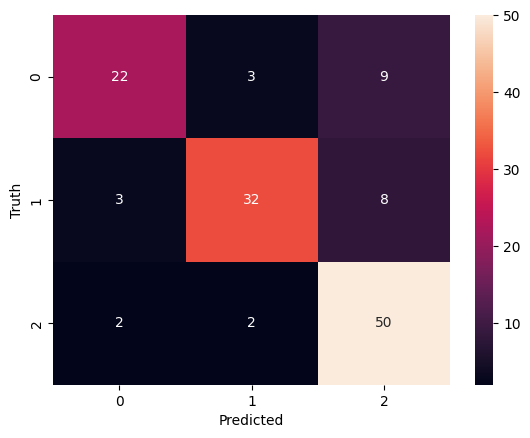

<Figure size 1000x700 with 0 Axes>

In [71]:
import seaborn as sb
cm2=confusion_matrix(y_test,y_predicted2)
sb.heatmap(cm2,annot=True)
plt.ylabel('Truth')
plt.xlabel('Predicted')
plt.figure(figsize=(10,7))

<Figure size 1000x700 with 0 Axes>

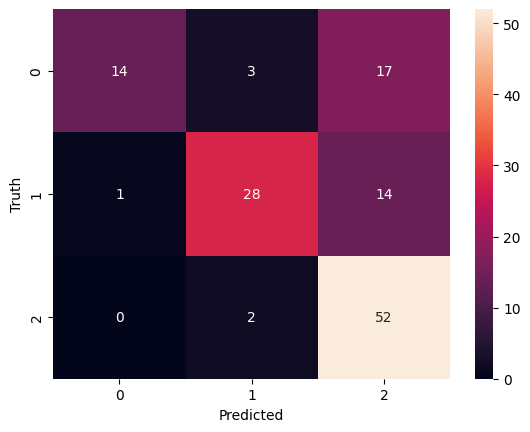

<Figure size 1000x700 with 0 Axes>

In [72]:
import seaborn as sb
cm2=confusion_matrix(y_test,y_predicted3)
sb.heatmap(cm2,annot=True)
plt.ylabel('Truth')
plt.xlabel('Predicted')
plt.figure(figsize=(10,7))

In [87]:
import pickle
with open('Sentiment_Analysis.pkl','wb') as file1:
    pickle.dump(model2,file1)

In [76]:
import pickle
with open('Sentiment_Analysis2.pkl','wb') as file1:
    pickle.dump(model3,file1)

In [77]:
dictionary={
    0:"negative",
    1:"positive",
    2:"neutral",
}

In [111]:
def model_predict(X):
  res=model3.predict(X_test[X])
  answer=res[0]
  result = dictionary[answer]
  print("The Sentiment Is : ",result)

In [100]:
y_predicted = model3.predict(X_test)
y_predicted3

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 0,
       2, 1, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1],
      dtype=int64)

In [112]:
model_predict(0)
model_predict(1)
model_predict(2)
model_predict(3)
model_predict(4)
model_predict(5)
model_predict(6)
model_predict(7)
model_predict(8)
model_predict(9)
model_predict(10)

The Sentiment Is :  neutral
The Sentiment Is :  neutral
The Sentiment Is :  neutral
The Sentiment Is :  neutral
The Sentiment Is :  neutral
The Sentiment Is :  neutral
The Sentiment Is :  positive
The Sentiment Is :  neutral
The Sentiment Is :  neutral
The Sentiment Is :  negative
The Sentiment Is :  neutral


In [113]:
model_predict(10)

The Sentiment Is :  neutral


In [114]:
model_predict(9)

The Sentiment Is :  negative


In [115]:
model_predict(130)

The Sentiment Is :  positive


In [116]:
model_predict(5)

The Sentiment Is :  neutral
